## we need to install first the fbprophet which is not so easy to install we need to go for dependency and also the g++ compiler

In [1]:
#first import the required module for the prediction
#its preeety straight forward
import pandas as pd
from fbprophet import Prophet

In [2]:
## import the csv data from quandl 
import quandl
#we take the data from the quandl website
#create a data frame
#df = quandl.get('WIKI/GOOGL')


In [3]:
## now save the data in a csv format for further use
#df.to_csv('google_stock.csv')
df = pd.read_csv('google_stock.csv')

In [4]:
## now prepare the datasets for the 
df1=df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]

In [5]:
## we need to add the percent volatility which is an important feture
df1['volatility']=(df1['Adj. High']-df1['Adj. Close'])/df1['Adj. Close']
## and we need to add the percent change for the stock market
df1['PCT_Change']=(df1['Adj. Close']-df1['Adj. Open'])/df1['Adj. Open']
df1['Date']=df['Date']
df1.head()

/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/root/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,volatility,PCT_Change,Date
0,50.159839,52.191109,48.128568,50.322842,44659000.0,0.037126,0.003250,2004-08-19
1,50.661387,54.708881,50.405597,54.322689,22834300.0,0.007109,0.072270,2004-08-20
2,55.551482,56.915693,54.693835,54.869377,18256100.0,0.037294,-0.012279,2004-08-23
3,55.792225,55.972783,51.945350,52.597363,15247300.0,0.064175,-0.057264,2004-08-24
4,52.542193,54.167209,52.100830,53.164113,9188600.0,0.018868,0.011837,2004-08-25


## final datasets


In [6]:
df1=df1[['Date','Adj. Close','volatility','PCT_Change','Adj. Open','Adj. Volume']]

In [7]:
df1.head()

,Date,Adj. Close,volatility,PCT_Change,Adj. Open,Adj. Volume
0,2004-08-19,50.322842,0.037126,0.003250,50.159839,44659000.0
1,2004-08-20,54.322689,0.007109,0.072270,50.661387,22834300.0
2,2004-08-23,54.869377,0.037294,-0.012279,55.551482,18256100.0
3,2004-08-24,52.597363,0.064175,-0.057264,55.792225,15247300.0
4,2004-08-25,53.164113,0.018868,0.011837,52.542193,9188600.0


In [8]:
##df2 = df1[['Adj. Close']]
##df2.head()
##df2.reset_index(level=0, inplace=True)
##df2.head()
#df2 = df2.rename(columns={'Date': 'ds'})
##df2.head()
##df2 = df2.rename(columns={'Adj. Close': 'y'})
##df2.head()
##df= df2
##m = Prophet()
##m.fit(df)

In [9]:
df2 = df1.rename(columns={'Date': 'ds'})
df2 = df2.rename(columns={'Adj. Close': 'y'})

In [10]:
df2.head()

,ds,y,volatility,PCT_Change,Adj. Open,Adj. Volume
0,2004-08-19,50.322842,0.037126,0.003250,50.159839,44659000.0
1,2004-08-20,54.322689,0.007109,0.072270,50.661387,22834300.0
2,2004-08-23,54.869377,0.037294,-0.012279,55.551482,18256100.0
3,2004-08-24,52.597363,0.064175,-0.057264,55.792225,15247300.0
4,2004-08-25,53.164113,0.018868,0.011837,52.542193,9188600.0


#### now we fit the model my instantiate a Prophet object.and the value will be pass through the constructor then we fit the model

In [11]:
m = Prophet()
m.fit(df2)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/anaconda2/lib/python2.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


## lets predict the feture datasets
### Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. You can get a suitable dataframe that extends into the future a specified number of days using the helper method Prophet.make_future_dataframe. By default it will also include the dates from the history, so we will see the model fit as well.

In [17]:
future = m.make_future_dataframe(periods=365)

In [18]:
future.tail()

,ds
3784,2019-03-23
3785,2019-03-24
3786,2019-03-25
3787,2019-03-26
3788,2019-03-27


In [19]:
## it will extend the date with new date 

In [20]:
forecast = m.predict(future)

In [22]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
3784,2019-03-23,1244.173812,1174.563951,1305.147207,1164.214267,1304.561064,-6.575616,-6.575616,-6.575616,0.0,0.0,0.0,-0.733775,-0.733775,-0.733775,-5.841842,-5.841842,-5.841842,1237.598195
3785,2019-03-24,1244.642623,1174.333901,1305.873182,1153.925386,1307.180959,-7.033933,-7.033933,-7.033933,0.0,0.0,0.0,-0.733775,-0.733775,-0.733775,-6.300158,-6.300158,-6.300158,1237.608691
3786,2019-03-25,1245.111435,1174.528913,1306.599156,1158.589596,1308.381641,-6.473032,-6.473032,-6.473032,0.0,0.0,0.0,0.280695,0.280695,0.280695,-6.753728,-6.753728,-6.753728,1238.638402
3787,2019-03-26,1245.580246,1174.736325,1307.376936,1159.954835,1310.150660,-6.997328,-6.997328,-6.997328,0.0,0.0,0.0,0.203298,0.203298,0.203298,-7.200626,-7.200626,-7.200626,1238.582918
3788,2019-03-27,1246.049058,1174.977363,1308.355778,1161.040618,1313.014489,-7.054385,-7.054385,-7.054385,0.0,0.0,0.0,0.584417,0.584417,0.584417,-7.638803,-7.638803,-7.638803,1238.994673


#### The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3784,2019-03-23,1237.598195,1164.214267,1304.561064
3785,2019-03-24,1237.608691,1153.925386,1307.180959
3786,2019-03-25,1238.638402,1158.589596,1308.381641
3787,2019-03-26,1238.582918,1159.954835,1310.150660
3788,2019-03-27,1238.994673,1161.040618,1313.014489


In [24]:
samp_forcast=forecast[['ds', 'yhat']]

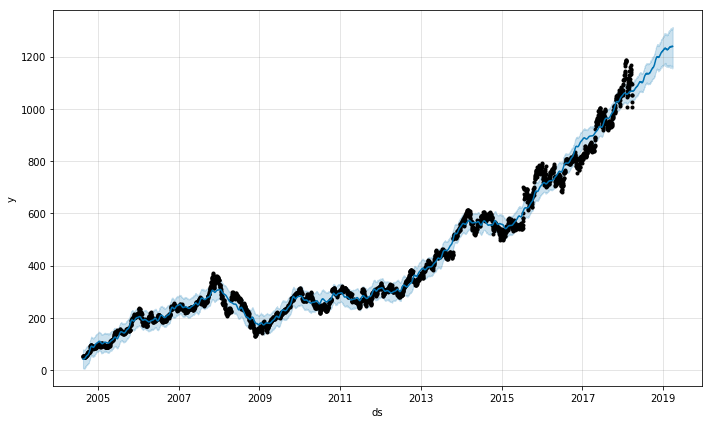

In [25]:
fig1 = m.plot(forecast)

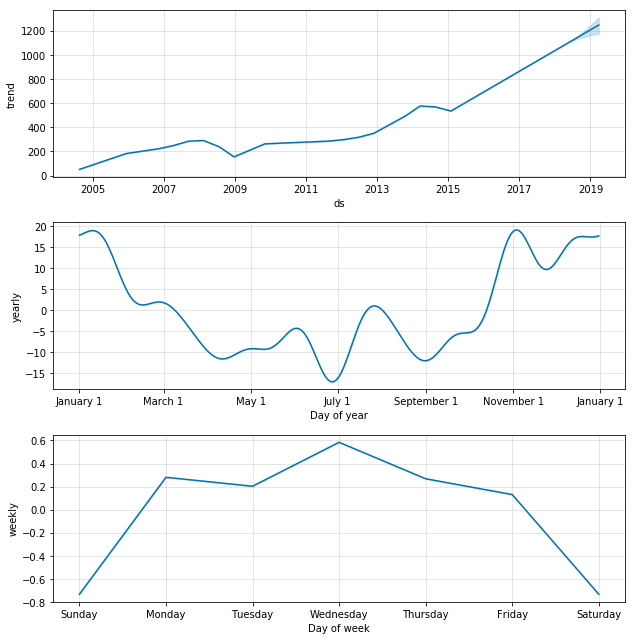

In [26]:
fig2 = m.plot_components(forecast)